<a href="https://colab.research.google.com/github/sameeraiz/EDA-1-Play-Store-review-Analysis/blob/main/Mohammad_Faiz_Play_Store_app_review_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA PROJECT : PLAYSTORE APPS REVIEW ANALYSYS**
### The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
### Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
### Explore and analyze the data to discover key factors responsible for app engagement and success.

---



In [ ]:
# IMPORTED ALL THE NECESSARY PYTHON LIBRARIES THAT WE ARE GOING TO USE IN THE EDA-PROJECT.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

### ***PLAY STORE DATA -- .CSV FILE***

In [ ]:
# PLAY STORE DATA FILE:---
# https://drive.google.com/file/d/1Ei62LaB9L5jJjaJEysPKfJ5aWO9AMUN8/view?usp=sharing
data = pd.read_csv("https://drive.google.com/uc?id=1Ei62LaB9L5jJjaJEysPKfJ5aWO9AMUN8")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# BASIC INFORMTION ABOUT THE (PLAY-STORE-DATA) FILE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# DESCRIBING THE STATISTICAL COLUMN OF THE DATA SET
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
# REMOVING THE INSTALL COLUMN'S ('+' & ',') SIGNS :---
# CONVERTED THE OBJECT DATA-TYPE TO INT DATA TYPE :---
data['Installs'] = data['Installs'].str.replace('+','').str.replace(',','').replace('Free', '0',regex = True).astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# DROPPED THE WRONG RATING OF THE GIVEN DATA :---     (APP = Life Made WI-Fi Touchscreen Photo Frame) (RATING = 19)
data = data.drop(labels=[10472], axis = 0)

In [ ]:
# EXTACTING ALL APP'S RATING COUNT:---
Rating= data["Rating"].value_counts
Rating

<bound method IndexOpsMixin.value_counts of 0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64>

In [ ]:
# FINDING THE UNIQUE VALUE OF THE (LAST_UPDATE) COLUMN:---
date = data["Last Updated"].value_counts()
date


August 3, 2018       326
August 2, 2018       304
July 31, 2018        294
August 1, 2018       285
July 30, 2018        211
                    ... 
March 8, 2015          1
March 25, 2015         1
December 17, 2013      1
October 11, 2014       1
March 23, 2014         1
Name: Last Updated, Length: 1377, dtype: int64

In [ ]:
# CONVERTING THE OBJECT (LAST_UPDATE) COLUMN TO DATETIME DATA TYPE:--- 
data["Last Updated"] = pd.to_datetime(data["Last Updated"],errors='coerce')



### ***USER REVIEW DATA - .CSV FILE*** 

In [ ]:
# USER REVIEW DATA FILE:---
# https://drive.google.com/file/d/1vEhmXB6E4NBVuwnc08WLIkp0ICqRvc24/view?usp=sharing
user = pd.read_csv("https://drive.google.com/uc?id=1vEhmXB6E4NBVuwnc08WLIkp0ICqRvc24")
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# BASIC INFORMATION ABOUT THE DATA SET (USER-REVIEW) :---
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# DESCRIBING THE STATISTICAL COLUMN OF THE DATA SET (USER-REVIEW):---
user.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# DEFINING ALL THE COLUMN'S NAMES:---
user.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# DROPPED THE ALL NULL VALUES FROM THE DATA SET (USER-REVIEW):---
user = user.dropna()
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


# **All Question Over The Topic , Play Store Review analysis**

# **Question 1**
***FIND THE PERCENTAGE OF +VE, -VE AND NEUTRAL REVIEWS IN THE SENTIMENT COLUMN ?***

In [ ]:
# Counting the all type of sentiments and storing them in a variable called 'sentiment'.
Sentiment = user["Sentiment"].value_counts()
Sentiment

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

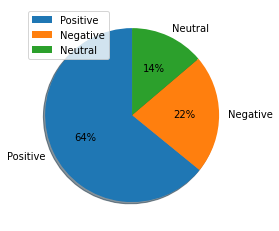

In [ ]:
# Defining the labels 
mylabels = ["Positive", "Negative", "Neutral"]

# plotting the labels and shadows.
plt.pie(Sentiment , labels = mylabels,startangle = 90, autopct='%1.0f%%', shadow = True)

# To show the legends.
plt.legend()

# To show the plotted pie-chart.
plt.show() 

# ***Question 2***
***FIND THE TOTAL NUMBER OF PAID AND FREE APPS ON THE GOOGLE PLAY STORE ?*** 

In [ ]:
# REPLACED THE WRONG DATA ('0') TO ('Free') to correct the data set type column. 
# later count the value as well.
Sentiment = data["Type"].str.replace('0','Free').value_counts()

# simply printing it.
Sentiment

Free    10039
Paid      800
Name: Type, dtype: int64

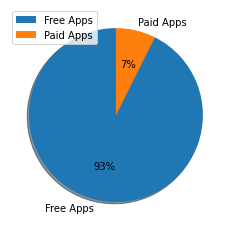

In [ ]:
# Defining the labels name
mylabels = ["Free Apps", "Paid Apps"]

# Defined the attributes .
plt.pie(Sentiment , labels = mylabels,startangle = 90, autopct='%1.0f%%', shadow = True)

# Made the legend
plt.legend()

# To show the pie-chart plot.
plt.show() 

# ***Question 3***
***WHICH CATEGORY(GENRES) HAS THE HIGHEST RATING ON THE PLAY STORE APP?***

In [ ]:
# Grouping the same category's apps and finding the max rating. 
highest_rated_category = data.groupby(by = "Category").Rating.max().sort_values(ascending=False)

# print it.
highest_rated_category

Category
ART_AND_DESIGN         5.0
GAME                   5.0
SPORTS                 5.0
SOCIAL                 5.0
SHOPPING               5.0
PRODUCTIVITY           5.0
PHOTOGRAPHY            5.0
PERSONALIZATION        5.0
PARENTING              5.0
NEWS_AND_MAGAZINES     5.0
MEDICAL                5.0
LIFESTYLE              5.0
LIBRARIES_AND_DEMO     5.0
TRAVEL_AND_LOCAL       5.0
HEALTH_AND_FITNESS     5.0
FOOD_AND_DRINK         5.0
FINANCE                5.0
FAMILY                 5.0
EVENTS                 5.0
DATING                 5.0
COMMUNICATION          5.0
COMICS                 5.0
BUSINESS               5.0
BOOKS_AND_REFERENCE    5.0
TOOLS                  5.0
AUTO_AND_VEHICLES      4.9
MAPS_AND_NAVIGATION    4.9
VIDEO_PLAYERS          4.9
EDUCATION              4.9
BEAUTY                 4.9
HOUSE_AND_HOME         4.8
WEATHER                4.8
ENTERTAINMENT          4.7
Name: Rating, dtype: float64

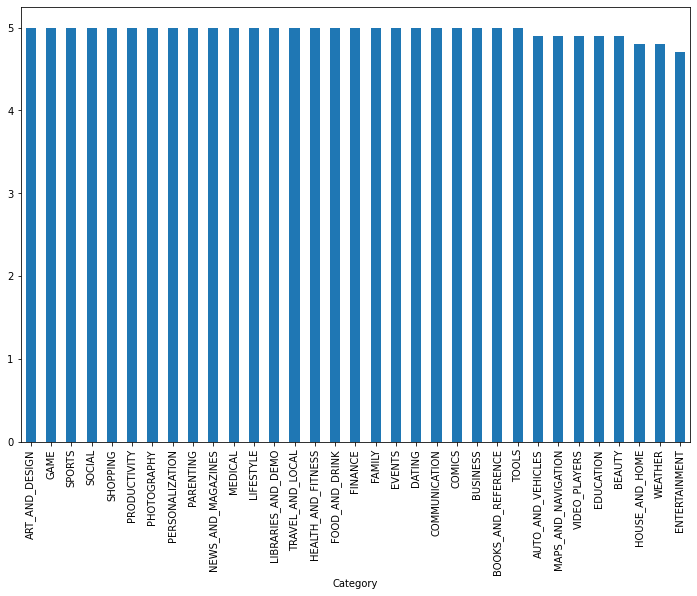

In [ ]:
# plotting the Bar-Graph of highest-lowest apps rating. 
highest_rated_category.plot(kind='bar',figsize=(12, 8))


# ***Question 4***
***WHICH CATEGORY(GENRES) HAS THE HIGHEST REVIEW ON THE PLAY STORE APP?***

In [ ]:
# Replacing the 'M' by empty string and changed it's type to float.
data['Reviews']=data['Reviews'].str.replace('M','').astype(float)

# Grouping the same category's apps and finding the max review.
highest_Reviews_category = data.groupby(by = "Category").Reviews.max().sort_values(ascending=False)

# Print it.
highest_Reviews_category

Category
SOCIAL                 78158306.0
COMMUNICATION          69119316.0
GAME                   44893888.0
FAMILY                 44881447.0
TOOLS                  42916526.0
VIDEO_PLAYERS          25655305.0
SPORTS                 14184910.0
NEWS_AND_MAGAZINES     11667403.0
PHOTOGRAPHY            10859051.0
TRAVEL_AND_LOCAL        9235373.0
PERSONALIZATION         7464996.0
MAPS_AND_NAVIGATION     7232629.0
ENTERTAINMENT           7165362.0
EDUCATION               6290507.0
SHOPPING                6212081.0
PRODUCTIVITY            5383985.0
HEALTH_AND_FITNESS      4559407.0
BOOKS_AND_REFERENCE     2915189.0
LIFESTYLE               2789775.0
WEATHER                 2371543.0
FINANCE                 1374549.0
BUSINESS                1279800.0
FOOD_AND_DRINK          1032935.0
COMICS                  1013944.0
PARENTING                658087.0
DATING                   516917.0
HOUSE_AND_HOME           417907.0
LIBRARIES_AND_DEMO       332083.0
ART_AND_DESIGN           295237.0
AUTO_

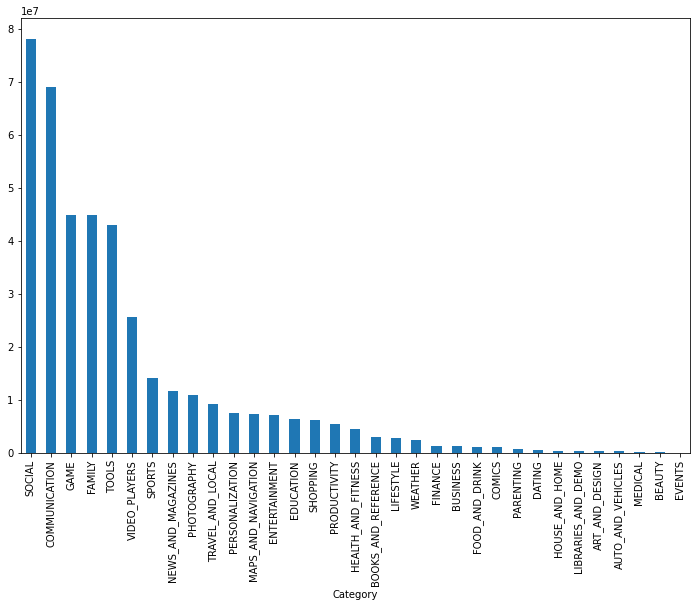

In [ ]:
# plotting the Bar-Graph of highest-lowest apps reviews.
highest_Reviews_category.plot(kind='bar',figsize=(12, 8))  

# ***Question 5***
***WHICH CATEGORY(GENRES) HAS THE HIGHEST DOWNLOADS(INSTALL) ON THE PLAY STORE APP?***

In [ ]:
# Grouping the same category's apps and finding the max download(install).
Highest_downloaded_Category = data.groupby(by = "Category").Installs.max().sort_values(ascending=False)
Highest_downloaded_Category

Category
FAMILY                 1000000000
TOOLS                  1000000000
PHOTOGRAPHY            1000000000
PRODUCTIVITY           1000000000
GAME                   1000000000
SOCIAL                 1000000000
ENTERTAINMENT          1000000000
NEWS_AND_MAGAZINES     1000000000
COMMUNICATION          1000000000
TRAVEL_AND_LOCAL       1000000000
BOOKS_AND_REFERENCE    1000000000
VIDEO_PLAYERS          1000000000
HEALTH_AND_FITNESS      500000000
EDUCATION               100000000
SPORTS                  100000000
PERSONALIZATION         100000000
FINANCE                 100000000
BUSINESS                100000000
SHOPPING                100000000
LIFESTYLE               100000000
MAPS_AND_NAVIGATION     100000000
ART_AND_DESIGN           50000000
WEATHER                  50000000
PARENTING                10000000
LIBRARIES_AND_DEMO       10000000
AUTO_AND_VEHICLES        10000000
FOOD_AND_DRINK           10000000
DATING                   10000000
COMICS                   10000000
BEAUT

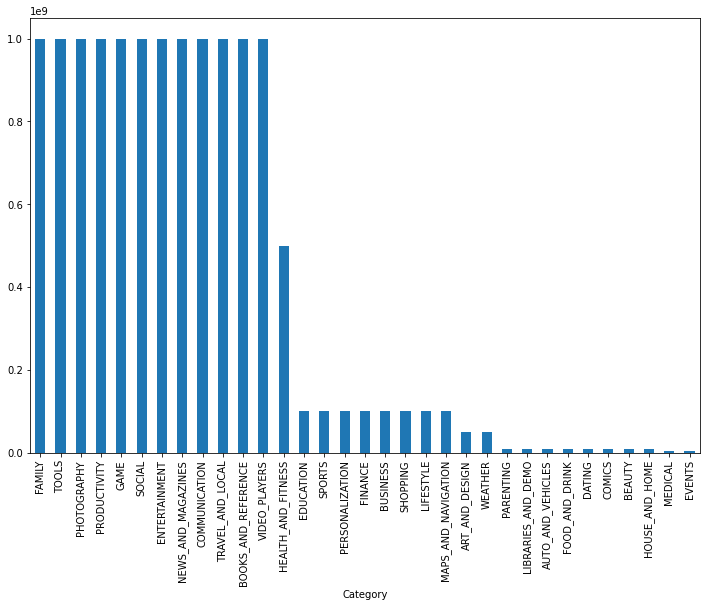

In [ ]:
# plotting the Bar-Graph of highest-lowest apps downloads(installs).
Highest_downloaded_Category.plot(kind='bar',figsize=(12, 8))  

# ***Question 6***
***FIND THE TOP 10-MOST INSTALLED APPS OF THE GOOGLE PLAY STORE APP ?***

In [ ]:
# Grouped 3 columns ("App","Rating","Type") and then performed the max and soring method.
highest_highest_Installs_App = data.groupby(["App","Rating","Type"]).Installs.max().sort_values(ascending=False).head(10)

# print it
highest_highest_Installs_App

App                            Rating  Type
Maps - Navigate & Explore      4.3     Free    1000000000
Skype - free IM & video calls  4.1     Free    1000000000
Instagram                      4.5     Free    1000000000
Google Drive                   4.4     Free    1000000000
WhatsApp Messenger             4.4     Free    1000000000
Subway Surfers                 4.5     Free    1000000000
Gmail                          4.3     Free    1000000000
Google News                    3.9     Free    1000000000
Google Photos                  4.5     Free    1000000000
Google Chrome: Fast & Secure   4.3     Free    1000000000
Name: Installs, dtype: int64

# ***Question 7***
### ***Find top-10 (Genres) categories wise play store apps installs ?*** 

In [ ]:
# Counting the Genre Column's values and it's count.
find = data["Genres"].value_counts().head(10)

#Printed it.
find

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

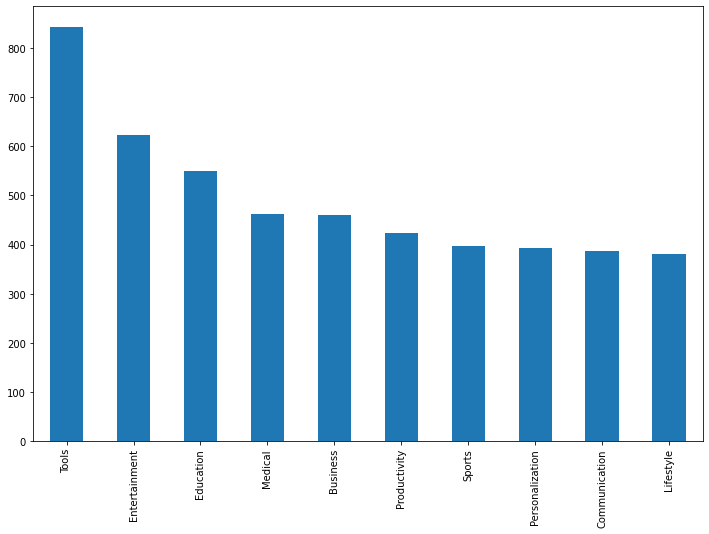

In [ ]:
# Plotting the bar Graph using Matplotlib.
find.plot(kind='bar',figsize=(12, 8))

# ***Question 8***
### ***Find out the CONTENT RATING based all apps availabe on Playstore ?***

In [ ]:
# Counting the "Content Rating app".
content = data["Content Rating"].value_counts()
content

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

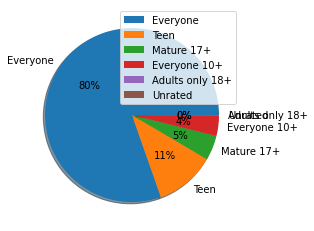

In [ ]:
# Defining the labels name
mylabels = ["Everyone", "Teen","Mature 17+","Everyone 10+","Adults only 18+","Unrated"]

# Defined the attributes .
plt.pie(content , labels = mylabels, autopct='%1.0f%%', shadow = True)

# Made the legend
plt.legend()

# To show the pie-chart plot.
plt.show() 

# ***Question 9***
### ***Find out how many apps updated every year ?***

In [ ]:
# Converting the LAST UPDATE object ot the DATETIME data type.
data["Last Updated"] = pd.to_datetime(data["Last Updated"],errors='coerce')

# Simply did the count.
years = data["Last Updated"].dt.year.value_counts()

#Print it.
years

2018    7349
2017    1867
2016     804
2015     459
2014     209
2013     110
2012      26
2011      15
2010       1
Name: Last Updated, dtype: int64

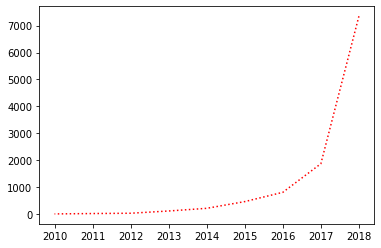

In [ ]:
# X-axis point
xpoints = (years)

# Doing plotting.
plt.plot(xpoints,color = 'r',ls = ':')

# Print it.
plt.show()

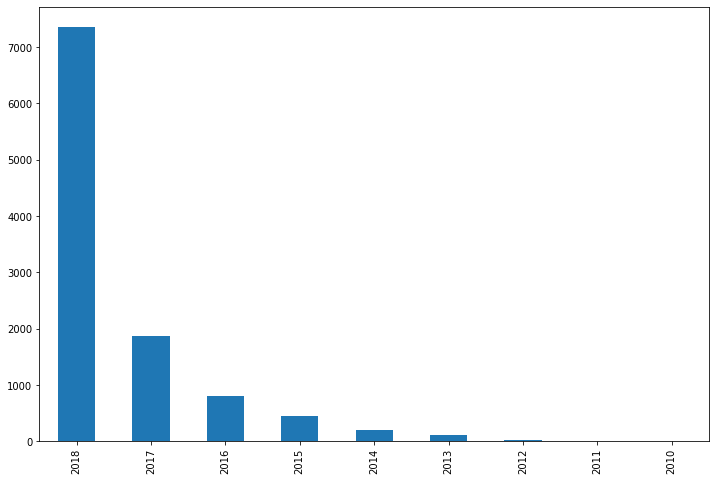

In [ ]:
# plotting the bar-graph using Matplotlib library
years.plot(kind='bar',figsize=(12, 8)) 

# ***Question 10***
### ***Find the count of all apps size?***

In [ ]:
data["Size"] = data["Size"].str.replace('M','').str.replace('k','').str.replace('+','').str.replace(',','')
adds = []
for i in data["Size"]:
  if i == "Varies with device":
     adds.append("Varies with device")
  elif i < "10.0":
    adds.append("less than 10 mb")   
  elif i > "50.0":
    adds.append("greater than 50 mb")
  elif i > "50.0" and i < "100.0":
    adds.append("50 to 100 mb")
  elif i > "100" and i < "200":
    adds.append("100 to 200 mb")
  elif i > "200" and i < "300":
    adds.append("200 to 300 mb")
  elif i > "300" and i < "400":
    adds.append("300 to 400 mb")
  elif i > "400.0":
    adds.append("greater than 400 mb")
adds    
Series_Size = pd.Series(adds)
Size_data = Series_Size.value_counts()
Size_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


greater than 50 mb     2397
100 to 200 mb          2296
200 to 300 mb          1834
Varies with device     1695
300 to 400 mb          1165
greater than 400 mb     928
less than 10 mb         497
dtype: int64

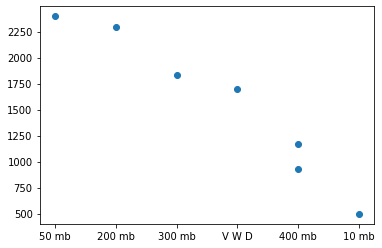

In [ ]:
# Defining the labels and attributes of the graph.
mylabels = ["50 mb","200 mb","300 mb","V W D","400 mb","400 mb","10 mb"]

# Plotting.
plt.scatter(mylabels,Size_data)

# Output
plt.show()

# ***Question 11***
**App size by year(Last Updated)**

In [ ]:
data["Size"] = data["Size"].str.replace('M','').str.replace('Varies with device','0').str.replace('k','').str.replace('+','').str.replace(',','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
years = data["Last Updated"].dt.year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


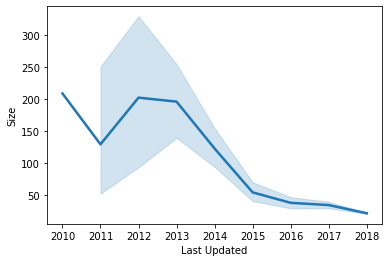

In [ ]:
sns.lineplot(years,data["Size"], linewidth=2.5)

# ***Question 12***
### ***Find the most installed app name on the PlayStore app. ?***

In [ ]:
# putting the 0 in place of null values.
id_max_installed_app = data['Installs'].fillna(0).astype('float64').argmax()                 

# Fetching the most installed app name.
max_installed_app = data['Installs'].fillna(0).astype('float64').max()    

In [ ]:
print(f'The most installed app on Play Store is {data["App"][id_max_installed_app]} and the total count of app install is {max_installed_app}')

The most installed app on Play Store is Google Play Books and the total count of app install is 1000000000.0


# ***Question 13***
### ***Find all the Sentiment polarity of apps ?***

In [ ]:
# Finding the mean of app's polarity by grouping in Descending order.
Apps_Polarity_Mean = user.groupby(by = "App").Sentiment_Polarity.mean().sort_values(ascending=False)

#print it.
Apps_Polarity_Mean

App
HomeWork                                             1.000000
Google Slides                                        0.933333
Daily Workouts - Exercise Fitness Routine Trainer    0.800000
Bed Time Fan - White Noise Sleep Sounds              0.781250
Cameringo Lite. Filters Camera                       0.770269
                                                       ...   
Call of Duty:Black Ops Zombies                      -0.162120
Fruit Block - Puzzle Legend                         -0.183333
DEER HUNTER 2018                                    -0.383333
Google Street View                                  -0.500000
Draw Your Game                                      -0.668490
Name: Sentiment_Polarity, Length: 865, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


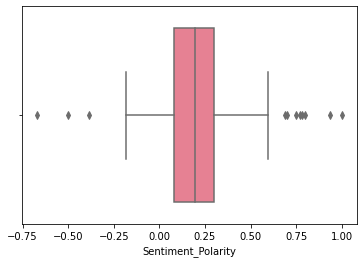

In [ ]:
# Plotting the graph using seaborn.
sns.boxplot(Apps_Polarity_Mean,palette = 'husl')

# ***Question 14***
### ***Find all the sentiment Subjectivity of apps ?***

In [ ]:
# # Finding the mean of sentiment subjectivity by grouping in Descending order.
Apps_Subjectivity_Mean = user.groupby(by = "App").Sentiment_Subjectivity.mean().sort_values(ascending=False)
Apps_Subjectivity_Mean 

App
Google Slides                                         0.916667
Daily Workouts - Exercise Fitness Routine Trainer     0.750000
Choice Hotels                                         0.719206
HTC Calendar                                          0.694949
Hitwe - meet people and chat                          0.694105
                                                        ...   
Calculator - free calculator, multi calculator app    0.154167
Free Live Talk-Video Call                             0.100000
HD Camera                                             0.000000
CBS News                                              0.000000
Google Trips - Travel Planner                         0.000000
Name: Sentiment_Subjectivity, Length: 865, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


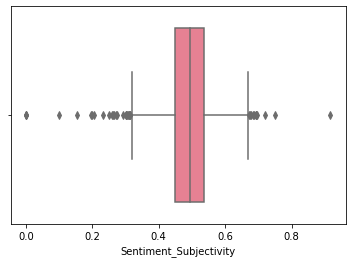

In [ ]:
# Plotting the graph using the seaborn 
sns.boxplot(Apps_Subjectivity_Mean,palette = 'husl')

# ***Question 15***
***Make the Heat map and find the relation between sentiment polarity and sentiment subjectivity?***

In [ ]:
corr_mat_hep = data.corr().round(2)
corr_mat_hep

,Rating,Reviews,Size,Installs
Rating,1.00,0.07,-0.03,0.05
Reviews,0.07,1.00,-0.01,0.64
Size,-0.03,-0.01,1.00,-0.03
Installs,0.05,0.64,-0.03,1.00


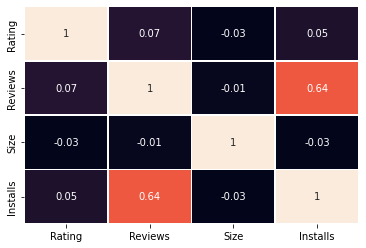

In [ ]:
# Plotting the graph using the seaborn
sns.heatmap(corr_mat_hep,annot= True,linewidths=0.7,cbar = False)